In [ ]:
train = data_no[0 : 3200]
test = data_no[3200 : 3200 + 960]

In [ ]:
# Normalization

sc1 = MinMaxScaler()
sc2 = MinMaxScaler()

tr_norm = sc1.fit_transform(train)
ts_norm = sc2.fit_transform(test)

In [ ]:
xtr_norm = np.delete(tr_norm,4,1)
ytr_norm = tr_norm[:,4:5]

xts_norm = np.delete(ts_norm,4,1)
yts_norm = ts_norm[:,4:5]

In [ ]:
transformer = GramianAngularField(image_size = 18, method = 'difference')
g_xtrain = transformer.transform(xtr_norm)
g_xtest = transformer.transform(xts_norm)

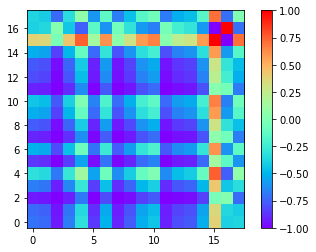

In [0]:
im = plt.imshow(g_xtrain[0], cmap='rainbow', origin='lower')
plt.colorbar(im)

In [ ]:
gxtrain = np.reshape(g_xtrain, (-1,18,18,1))
gxtest = np.reshape(g_xtest, (-1,18,18,1))
print(gxtrain.shape)
print(gxtest.shape)

In [ ]:
batch_size = 32
n_features = 18
n_output = 1

input_shape=(n_features, n_features, 1)

train = DataFrame()
val = DataFrame()

for i in range(1):
    model = Sequential()
    model.add(Conv2D(filters=8, kernel_size=(2, 2), strides=(1, 1), activation='relu', input_shape=input_shape))
    model.add(Conv2D(filters=8, kernel_size=(2, 2), strides=(1, 1), activation='relu'))
    model.add(AveragePooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(n_output, activation='relu'))

    optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
    model.compile(optimizer=optimizer, loss = 'mean_squared_error', metrics=['mean_squared_error'])
    history = model.fit(gxtrain, ytr_norm, epochs = 15, batch_size = batch_size, validation_split = 0.2, verbose = 1, shuffle=False)
    model.reset_states()
    train = history.history['loss']
    val = history.history['val_loss']

